# Airline Analysis

Resources:

Economics:
http://www.oecd.org/daf/competition/airlinecompetition.htm

Graph theoretical:
https://beta.vu.nl/nl/Images/werkstuk-meer_tcm235-280356.pdf


Loading the dataset:

In [1]:
from  geopy.distance import distance

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
!bash download_data.sh

Getting airports data
Getting airlines data
Getting routes data
Getting planes data


In [4]:
airports = pd.read_csv('airports.dat', header=None, names=
                      ["AirportID","Name", "City", "Country", "IATA", "ICAO",
                       "Latitude", "Longitude", "Altitude", "Timezone", "DST", "TzDatabaseTimeZone",
                       "Type", "Source"])
airlines = pd.read_csv('airlines.dat', header=None, names=
                       ["AirlineID", "Name", "Alias", "IATA", "ICAO", "Callsign", "Country", "Active"]
                       ,na_values='\\N')
routes = pd.read_csv('routes.dat', header=None, names=
                     ['Airline', 'AirlineID', 'SourceAirport', 'SourceAirportID', 'DestinationAirport',
                      'DestinationAirportID', 'Codeshare', 'Stops', 'Equipment'],
                    na_values='\\N')
planes = pd.read_csv('planes.dat', header=None, names=
                     ['Name', 'IATA code', 'ICAO code'])

In [5]:
merged_routes = pd.merge(airlines[airlines.Active == 'Y'], routes, on='AirlineID')

## TODO:
- get the distane of the edge based on longitude and latitude
- add all the information to the graph so we have an easy time calculating the measures.
- get list of graph theoretical measures to apply to airline networks:
    - number and strength of hubs
    - network robustness measures
    - number of/ precense if paths
    - diameter of the graph
    - entrality measures
    - spectrum of graph
    - measure of correlation between country label
    - how much in country/out of country 
    - number of triangles in graph
    - set weights if we have multiple fights to same place by same airline
- get planes associated with each flight in route, so we can get number of passagers. May do later only for the biggest airlines, at end of analysis

In [6]:
merged_routes.head(1)

,AirlineID,Name,Alias,IATA,ICAO,Callsign,Country,Active,Airline,SourceAirport,SourceAirportID,DestinationAirport,DestinationAirportID,Codeshare,Stops,Equipment
0,10,40-Mile Air,NaN,Q5,MLA,MILE-AIR,United States,Y,Q5,CKX,NaN,TKJ,7235.0,NaN,0,CNA


In [7]:
airports.head(1)

,AirportID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,TzDatabaseTimeZone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.08169,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports


In [8]:
airports_filtered = airports[['Name', 'Country', 'Longitude', 'Latitude', 'Timezone', 'IATA']]

In [9]:
airports_filtered.set_index('IATA', inplace=True)

In [10]:
location_mapping = airports_filtered.apply(lambda x: [x.Longitude, x.Latitude], axis=1).to_dict()

### Getting the distance between two airports:

In [11]:
element = airports_filtered.apply(lambda x: (x.Latitude, x.Longitude), axis=1)[0]
element2 = airports_filtered.apply(lambda x: (x.Latitude, x.Longitude), axis=1)[1]

In [12]:
distance(element, element2).km

106.2489585209369

Example analysis of one graph:

In [14]:
def create_airline_network(airline):
    df = merged_routes[merged_routes['Name'] == airline]
    Airline_Graph = nx.from_pandas_edgelist(df, 
                                      source='SourceAirport', target='DestinationAirport', edge_attr=['Country'])
    return Airline_Graph

In [15]:
Ryanair = create_airline_network('Ryanair')

In [16]:
nx.node_connectivity(Ryanair)

1

In [17]:
nx.degree_centrality(Ryanair)

{'AAR': 0.017142857142857144,
 'ACE': 0.1657142857142857,
 'AGA': 0.011428571428571429,
 'AGP': 0.2857142857142857,
 'AHO': 0.14857142857142858,
 'ALC': 0.24,
 'AOI': 0.02857142857142857,
 'ATH': 0.03428571428571429,
 'BCN': 0.22285714285714286,
 'BDS': 0.06285714285714286,
 'BES': 0.005714285714285714,
 'BGY': 0.36,
 'BHX': 0.12,
 'BIQ': 0.022857142857142857,
 'BLL': 0.10285714285714286,
 'BLQ': 0.18285714285714286,
 'BOD': 0.045714285714285714,
 'BOH': 0.09142857142857143,
 'BRE': 0.14285714285714285,
 'BRI': 0.11428571428571428,
 'BRQ': 0.005714285714285714,
 'BRS': 0.16,
 'BRU': 0.05142857142857143,
 'BSL': 0.011428571428571429,
 'BTS': 0.08571428571428572,
 'BUD': 0.08,
 'BVA': 0.26285714285714284,
 'BVE': 0.005714285714285714,
 'BZG': 0.017142857142857144,
 'BZR': 0.05142857142857143,
 'CAG': 0.12,
 'CCF': 0.05714285714285714,
 'CFE': 0.005714285714285714,
 'CFU': 0.07428571428571429,
 'CGN': 0.02857142857142857,
 'CHQ': 0.14857142857142858,
 'CIA': 0.2571428571428571,
 'CIY': 0.

In [18]:
nx.average_clustering(Ryanair)

0.3752100329195697

In [19]:
nx.k_nearest_neighbors(Ryanair)

{1: 84.6842105263158,
 2: 68.79545454545455,
 3: 57.0,
 4: 52.541666666666664,
 5: 52.3125,
 6: 52.72222222222222,
 7: 51.67857142857143,
 8: 45.390625,
 9: 37.74074074074074,
 10: 42.93333333333333,
 11: 44.696969696969695,
 12: 44.875,
 13: 43.83076923076923,
 14: 41.92857142857143,
 15: 43.5,
 16: 39.3125,
 18: 34.7,
 19: 31.210526315789473,
 20: 38.325,
 21: 28.19047619047619,
 22: 34.13636363636363,
 24: 38.25,
 25: 32.76,
 26: 35.92307692307692,
 27: 25.85185185185185,
 28: 32.38095238095238,
 29: 31.942528735632184,
 30: 32.31666666666667,
 32: 33.171875,
 33: 22.575757575757574,
 34: 22.705882352941178,
 35: 30.82857142857143,
 36: 28.52777777777778,
 37: 24.243243243243242,
 38: 26.894736842105264,
 39: 29.435897435897434,
 42: 26.30952380952381,
 43: 26.267441860465116,
 44: 25.40909090909091,
 45: 29.266666666666666,
 46: 25.08695652173913,
 49: 28.877551020408163,
 50: 26.52,
 63: 25.285714285714285,
 75: 19.14666666666667,
 76: 23.38157894736842,
 124: 14.620967741935484}

In [20]:
nx.triangles(Ryanair)

{'AAR': 3,
 'ACE': 100,
 'AGA': 1,
 'AGP': 255,
 'AHO': 101,
 'ALC': 144,
 'AOI': 5,
 'ATH': 11,
 'BCN': 228,
 'BDS': 28,
 'BES': 0,
 'BGY': 456,
 'BHX': 39,
 'BIQ': 4,
 'BLL': 46,
 'BLQ': 189,
 'BOD': 21,
 'BOH': 11,
 'BRE': 98,
 'BRI': 81,
 'BRQ': 0,
 'BRS': 82,
 'BRU': 12,
 'BSL': 1,
 'BTS': 56,
 'BUD': 50,
 'BVA': 244,
 'BVE': 0,
 'BZG': 2,
 'BZR': 9,
 'CAG': 73,
 'CCF': 13,
 'CFE': 0,
 'CFU': 23,
 'CGN': 2,
 'CHQ': 108,
 'CIA': 309,
 'CIY': 15,
 'CRL': 358,
 'CTA': 6,
 'CUF': 1,
 'DLE': 1,
 'DNR': 0,
 'DTM': 14,
 'DUB': 598,
 'EBU': 0,
 'EDI': 145,
 'EFL': 0,
 'EGC': 0,
 'EIN': 147,
 'EMA': 111,
 'ESU': 0,
 'FAO': 65,
 'FCO': 1,
 'FEZ': 24,
 'FKB': 29,
 'FMM': 40,
 'FMO': 0,
 'FNI': 1,
 'FSC': 0,
 'FUE': 56,
 'GDN': 21,
 'GOA': 6,
 'GPA': 0,
 'GRO': 201,
 'GRQ': 1,
 'GSE': 41,
 'HAU': 7,
 'HHN': 177,
 'IBZ': 119,
 'KGS': 11,
 'KIR': 5,
 'KRK': 160,
 'KTW': 7,
 'KUN': 49,
 'LBA': 49,
 'LBC': 1,
 'LDE': 1,
 'LDY': 4,
 'LEI': 4,
 'LEJ': 0,
 'LGW': 2,
 'LIG': 0,
 'LIL': 1,
 'LIS': 24,

In [21]:
nx.diameter(Ryanair)

4

In [22]:
nx.estrada_index(Ryanair)

3098422328095.5693

In [23]:
nx.eccentricity(Ryanair)

{'AAR': 3,
 'ACE': 3,
 'AGA': 3,
 'AGP': 3,
 'AHO': 3,
 'ALC': 3,
 'AOI': 3,
 'ATH': 3,
 'BCN': 3,
 'BDS': 3,
 'BES': 4,
 'BGY': 3,
 'BHX': 3,
 'BIQ': 3,
 'BLL': 3,
 'BLQ': 3,
 'BOD': 3,
 'BOH': 3,
 'BRE': 3,
 'BRI': 3,
 'BRQ': 4,
 'BRS': 3,
 'BRU': 4,
 'BSL': 3,
 'BTS': 3,
 'BUD': 3,
 'BVA': 3,
 'BVE': 4,
 'BZG': 3,
 'BZR': 3,
 'CAG': 3,
 'CCF': 3,
 'CFE': 4,
 'CFU': 3,
 'CGN': 4,
 'CHQ': 3,
 'CIA': 3,
 'CIY': 3,
 'CRL': 3,
 'CTA': 4,
 'CUF': 4,
 'DLE': 4,
 'DNR': 4,
 'DTM': 3,
 'DUB': 3,
 'EBU': 4,
 'EDI': 3,
 'EFL': 4,
 'EGC': 3,
 'EIN': 3,
 'EMA': 3,
 'ESU': 4,
 'FAO': 3,
 'FCO': 4,
 'FEZ': 3,
 'FKB': 3,
 'FMM': 3,
 'FMO': 4,
 'FNI': 3,
 'FSC': 4,
 'FUE': 3,
 'GDN': 3,
 'GOA': 3,
 'GPA': 4,
 'GRO': 3,
 'GRQ': 4,
 'GSE': 3,
 'HAU': 3,
 'HHN': 3,
 'IBZ': 3,
 'KGS': 3,
 'KIR': 3,
 'KRK': 3,
 'KTW': 3,
 'KUN': 3,
 'LBA': 3,
 'LBC': 4,
 'LDE': 3,
 'LDY': 3,
 'LEI': 3,
 'LEJ': 4,
 'LGW': 4,
 'LIG': 4,
 'LIL': 4,
 'LIS': 3,
 'LNZ': 4,
 'LPA': 3,
 'LPL': 3,
 'LPP': 4,
 'LRH': 3,
 'LTN': 3,

## Preliminary analysis of the biggest airports:

In [24]:
merged_routes.Name.value_counts().head(10)

Ryanair                    2484
American Airlines          2354
United Airlines            2180
Delta Air Lines            1981
US Airways                 1960
China Southern Airlines    1454
China Eastern Airlines     1263
Air China                  1260
Southwest Airlines         1146
easyJet                    1130
Name: Name, dtype: int64

In [25]:
Low_cost = ['Southwest Airlines', 'Virgin America', 'AirAsia', 'Ryanair','easyJet', 'WestJet', 'Pegasus Airlines', 'Spirit Airlines', 'Mango']

In [26]:
merged_routes[merged_routes.Name.isin(Low_cost)].Name.value_counts()

Ryanair               2484
Southwest Airlines    1146
easyJet               1130
WestJet                341
Pegasus Airlines       242
Spirit Airlines        242
AirAsia                180
Virgin America          66
Mango                   18
Name: Name, dtype: int64

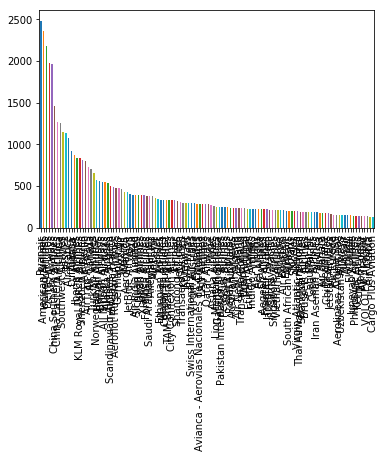

In [27]:
merged_routes.Name.value_counts().head(120).plot(kind='bar')

In [28]:
merged_routes.Country.value_counts().head(20)

United States           12840
China                    7216
United Kingdom           3162
Germany                  2930
Ireland                  2760
France                   2008
Russia                   1842
Canada                   1569
India                    1441
Japan                    1373
Italy                    1273
Spain                    1200
Netherlands              1149
Turkey                   1101
Australia                1092
United Arab Emirates      977
Brazil                    943
Taiwan                    880
Mexico                    804
Norway                    786
Name: Country, dtype: int64

In [29]:
merged_routes['Codeshare'] = merged_routes.Codeshare.fillna('N')

In [30]:
merged_routes.Codeshare.value_counts()

N    51922
Y    14589
Name: Codeshare, dtype: int64

In [31]:
merged_routes.head()

,AirlineID,Name,Alias,IATA,ICAO,Callsign,Country,Active,Airline,SourceAirport,SourceAirportID,DestinationAirport,DestinationAirportID,Codeshare,Stops,Equipment
0,10,40-Mile Air,NaN,Q5,MLA,MILE-AIR,United States,Y,Q5,CKX,NaN,TKJ,7235.0,N,0,CNA
1,10,40-Mile Air,NaN,Q5,MLA,MILE-AIR,United States,Y,Q5,FAI,3832.0,HKB,7242.0,N,0,CNA
2,10,40-Mile Air,NaN,Q5,MLA,MILE-AIR,United States,Y,Q5,HKB,7242.0,FAI,3832.0,N,0,CNA
3,10,40-Mile Air,NaN,Q5,MLA,MILE-AIR,United States,Y,Q5,TKJ,7235.0,CKX,NaN,N,0,CNA
4,21,Aigle Azur,NaN,ZI,AAF,AIGLE AZUR,France,Y,ZI,AAE,220.0,MRS,1353.0,N,0,319


In [32]:
def draw_airline_network(airline):
    df = merged_routes[merged_routes['Name'] == airline]
    Airline_Graph = nx.from_pandas_edgelist(df, 
                                      source='SourceAirport', target='DestinationAirport', edge_attr=['Country'])

    plt.figure(figsize=(10, 10))
    centrality = nx.betweenness_centrality(Airline_Graph)
    size = np.array(list(centrality.values()))*1000
    nx.draw_spring(Airline_Graph, node_size=size, width=0.1)
    plt.title(airline)
    plt.show()

/anaconda3/envs/Biblio/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


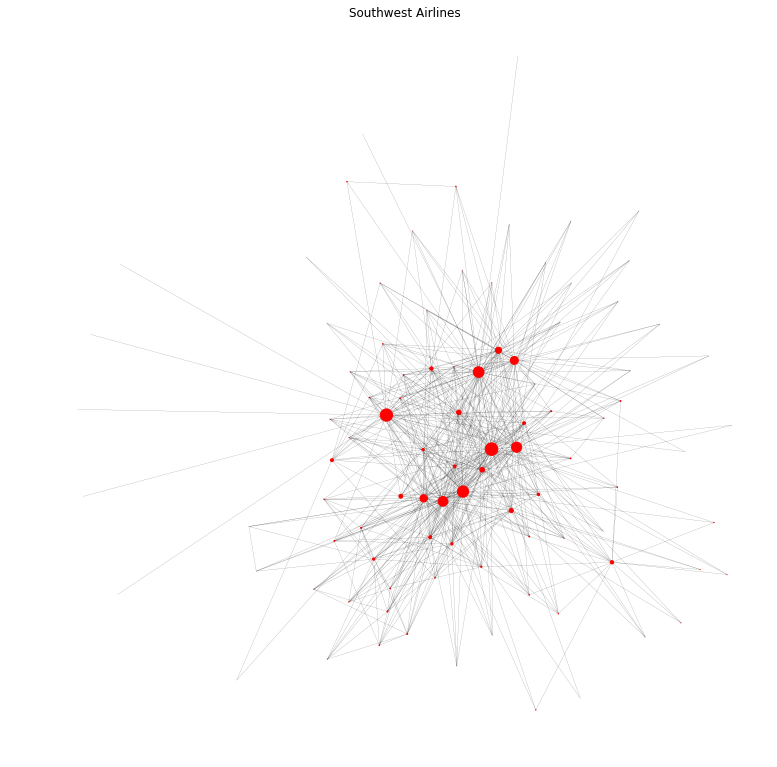

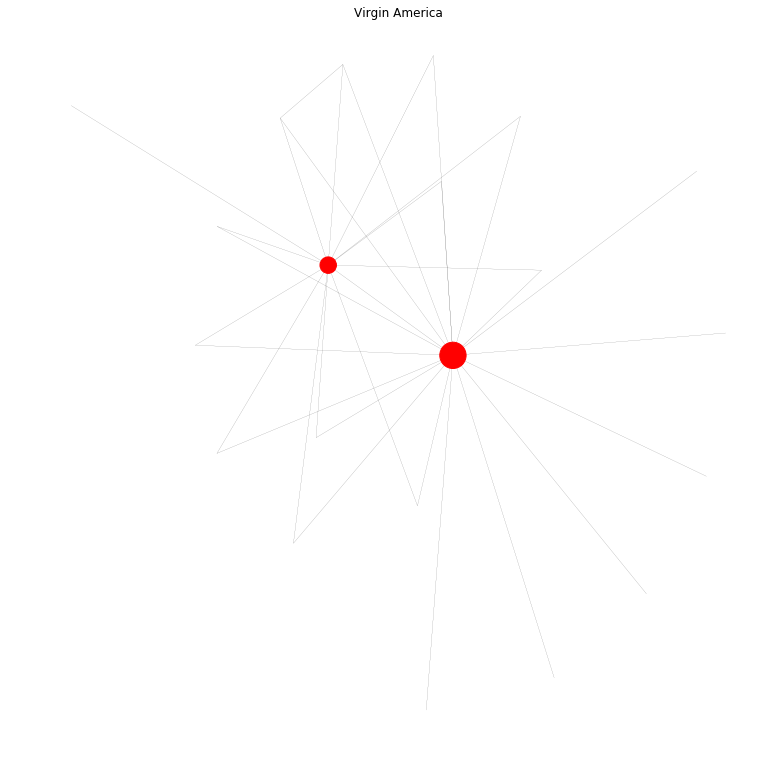

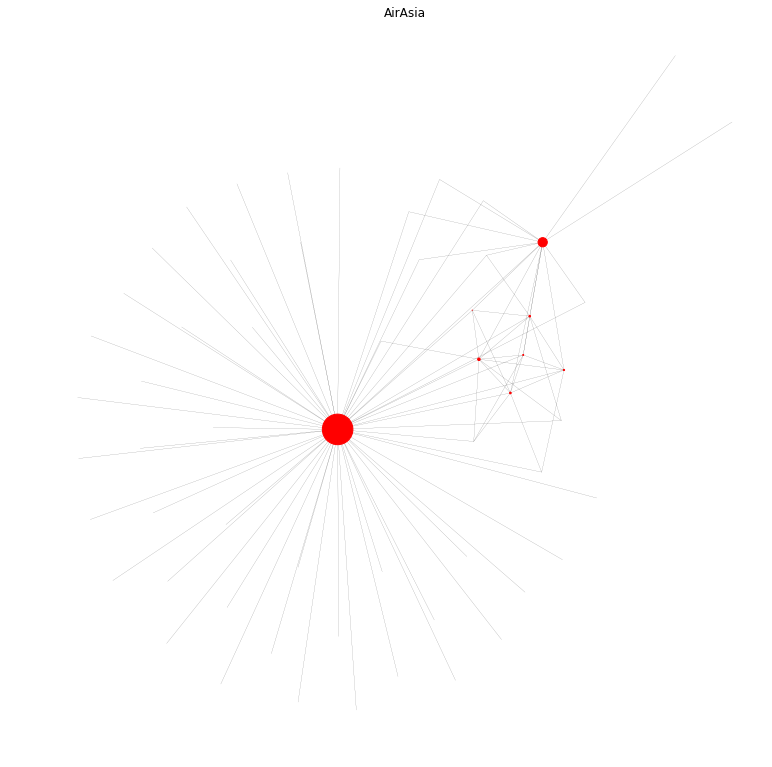

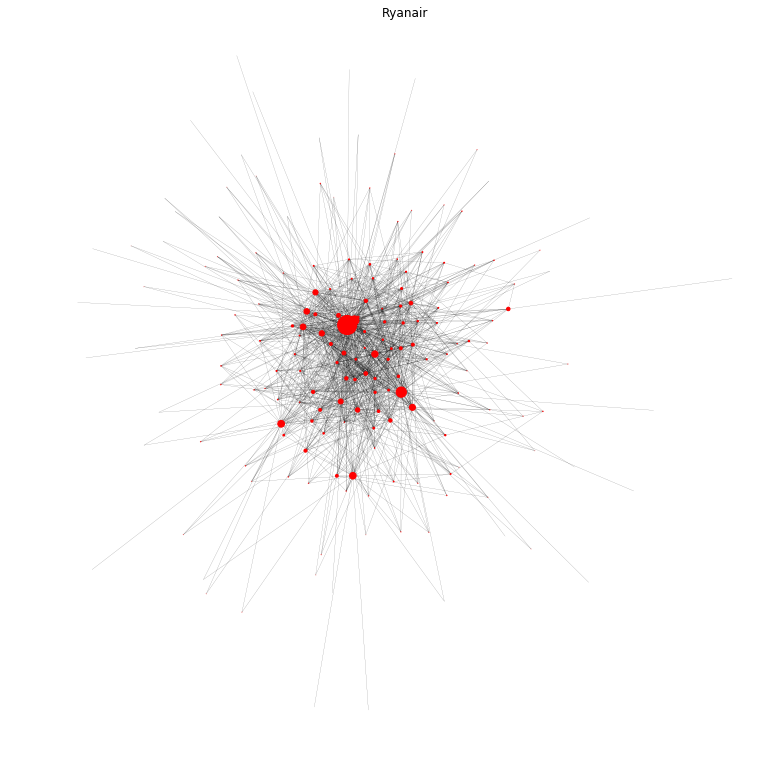

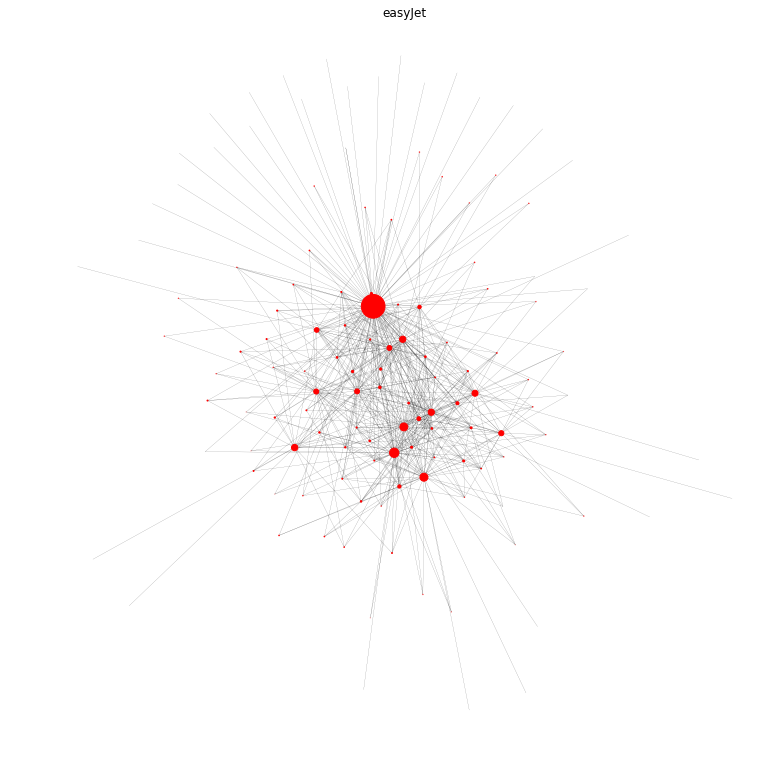

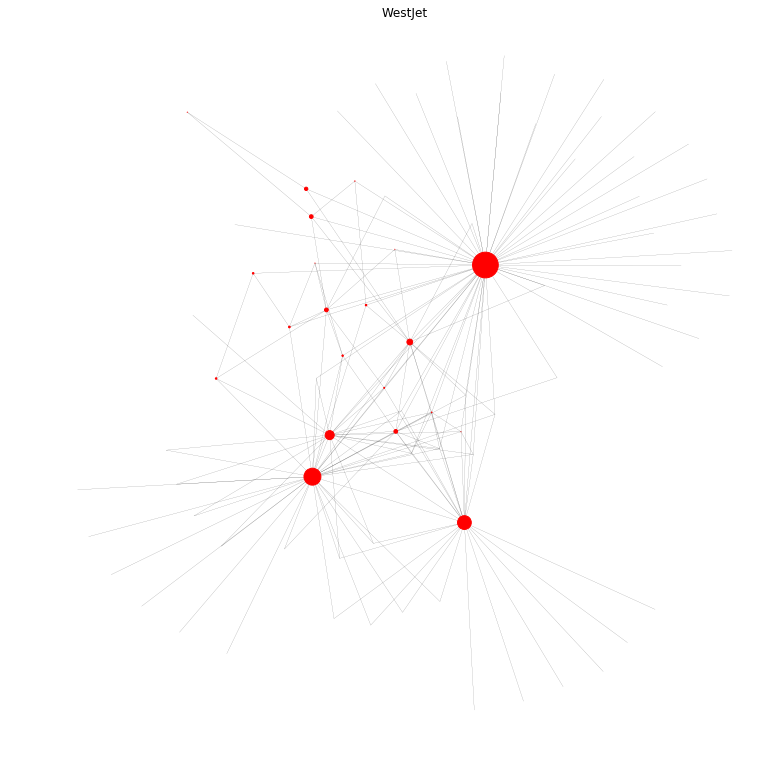

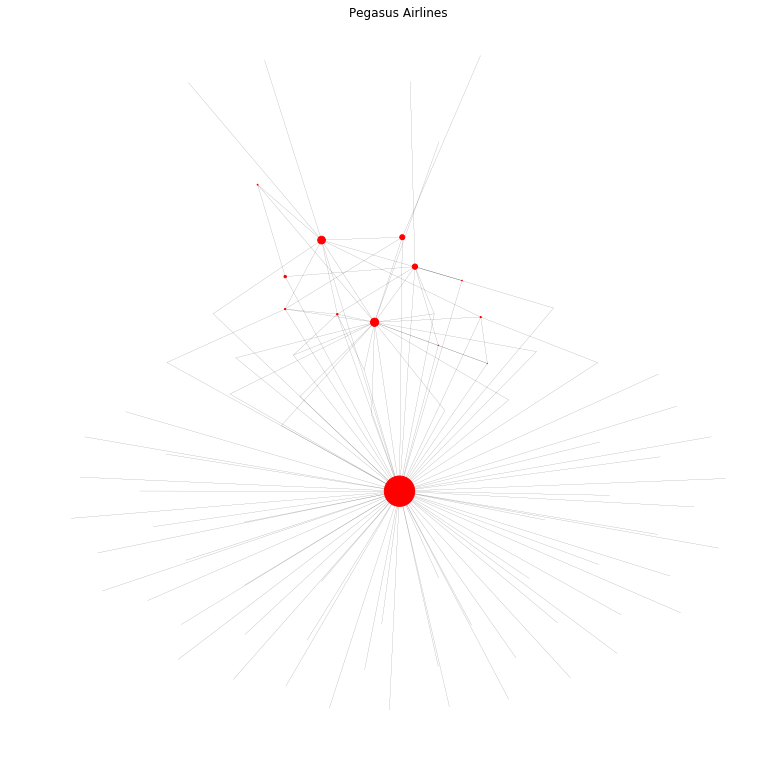

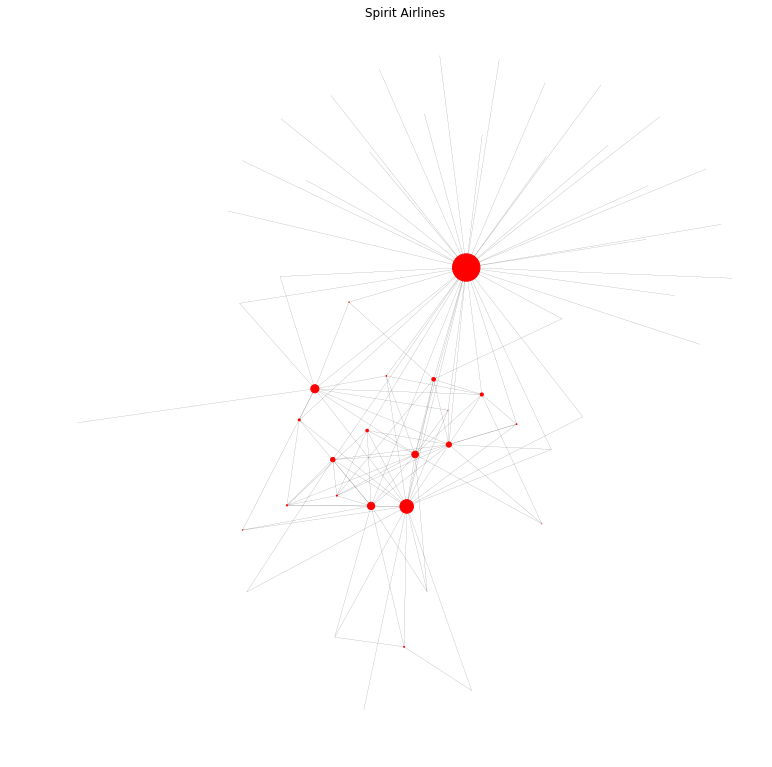

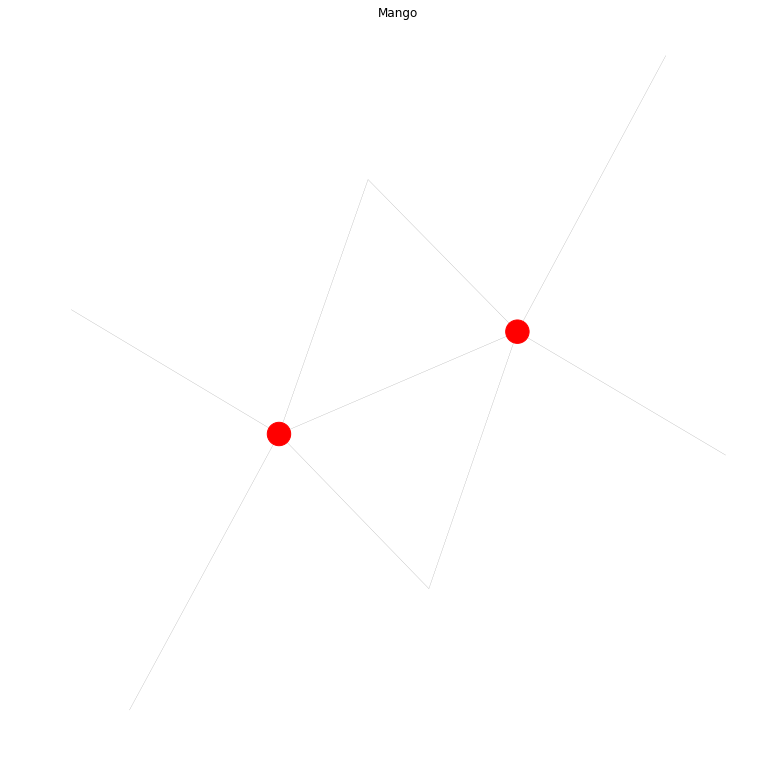

In [33]:
for cheap in Low_cost:
    draw_airline_network(cheap)

In [34]:
Best_Airlines = ['Singapore Airlines', 'Emirates', 'Lufthansa', 'Qatar Airways', 'Cathay Pacific']

/anaconda3/envs/Biblio/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


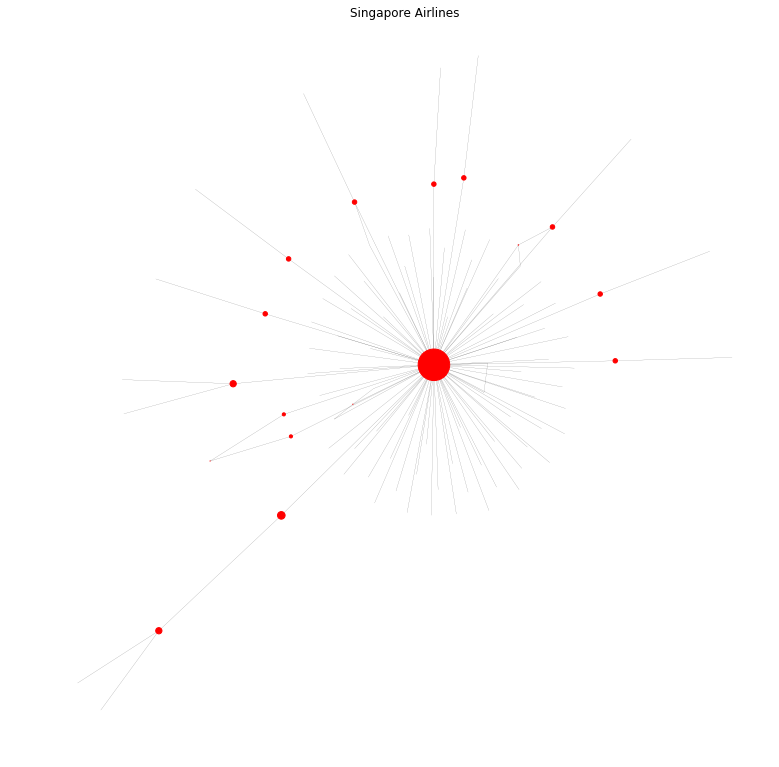

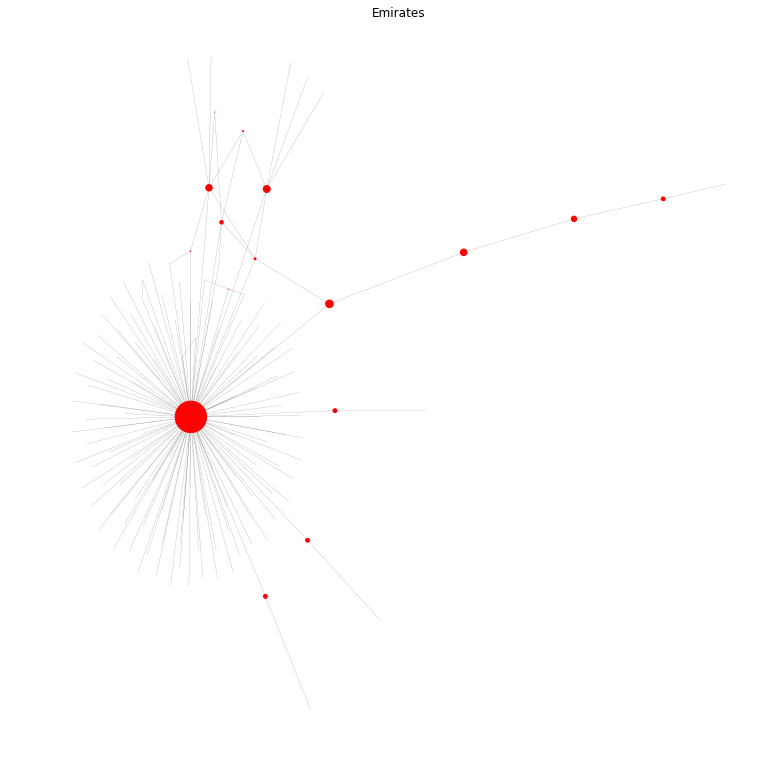

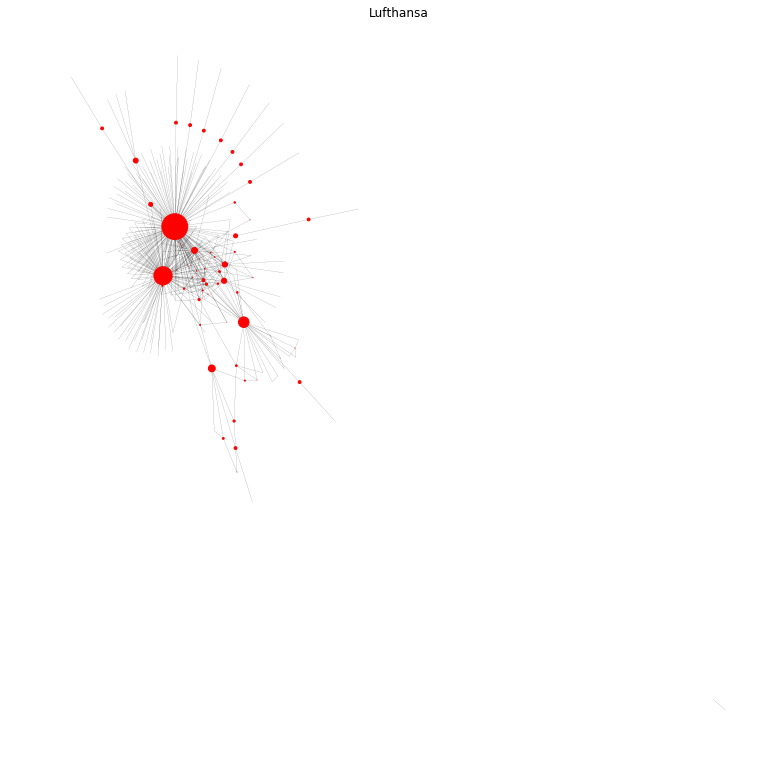

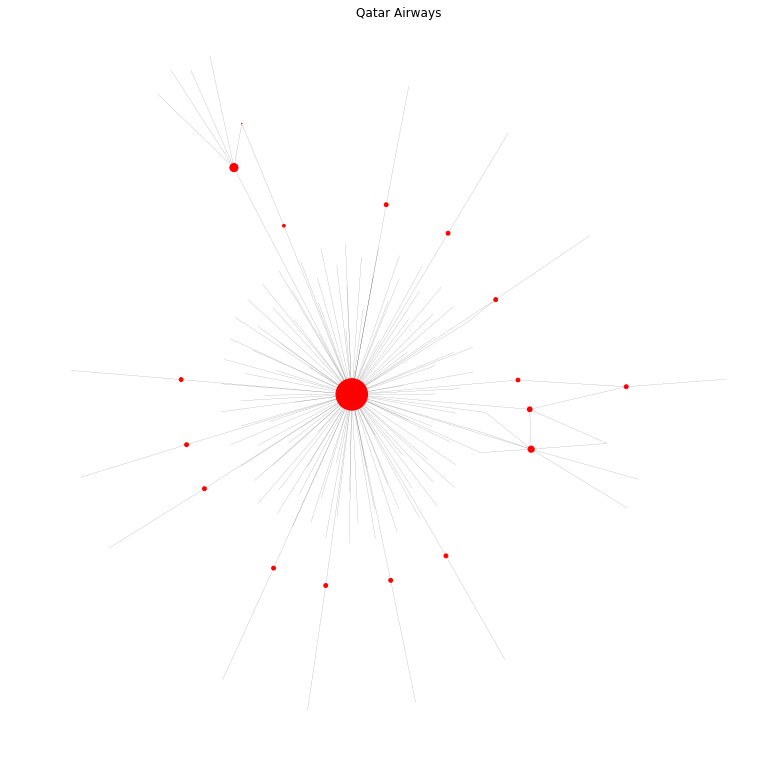

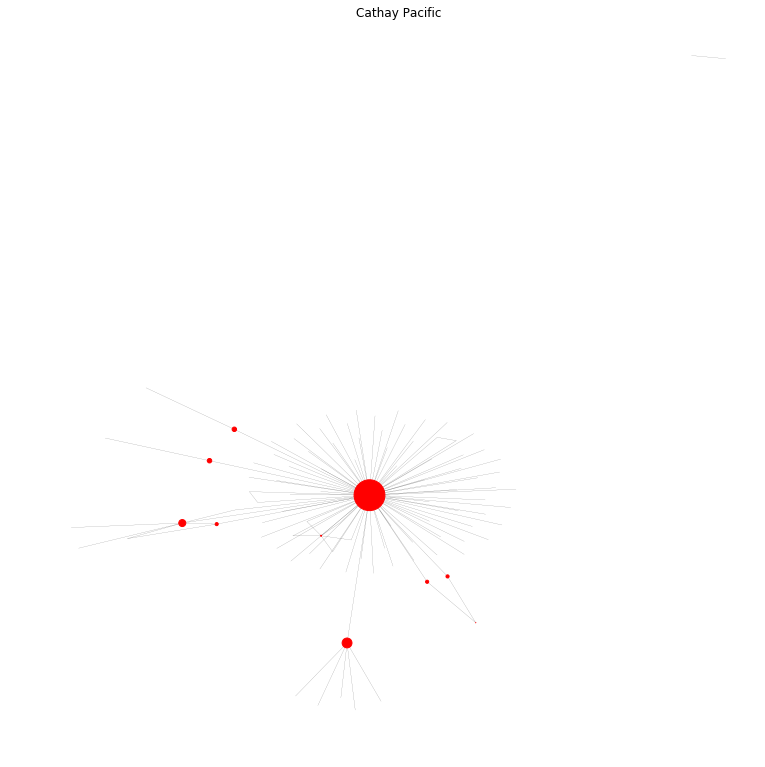

In [35]:
for best in Best_Airlines:
    draw_airline_network(best)

In [36]:
Large_Airlines = ['Delta Air Lines', 'Air France', 'China Southern Airlines', 'Turkish Airlines', 'American Airlines']

/anaconda3/envs/Biblio/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


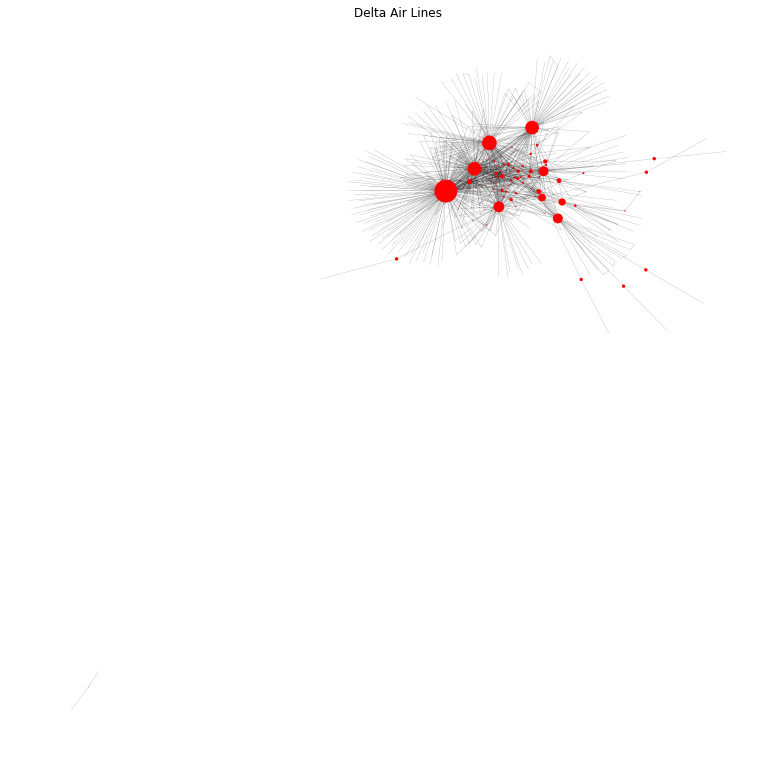

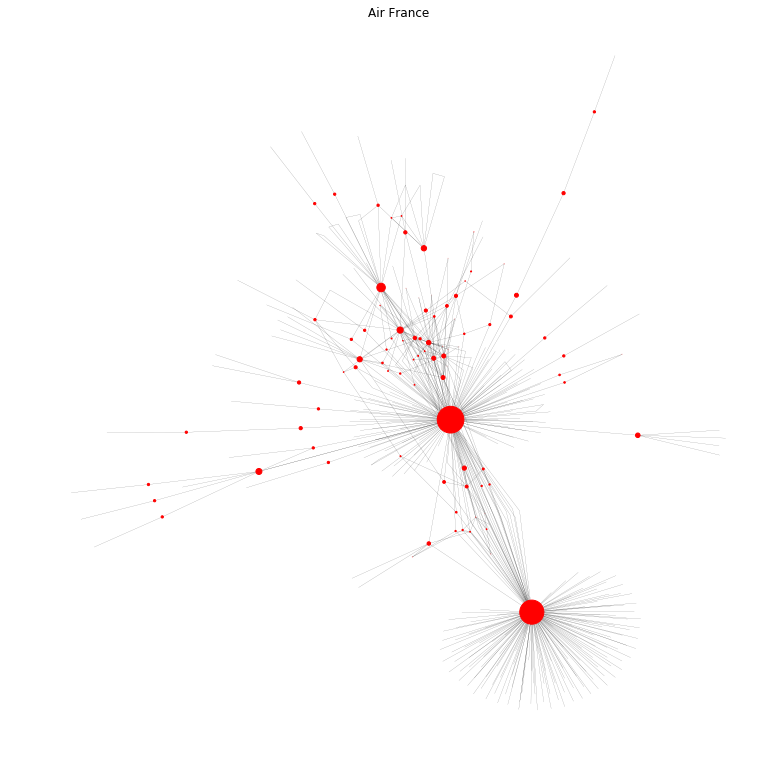

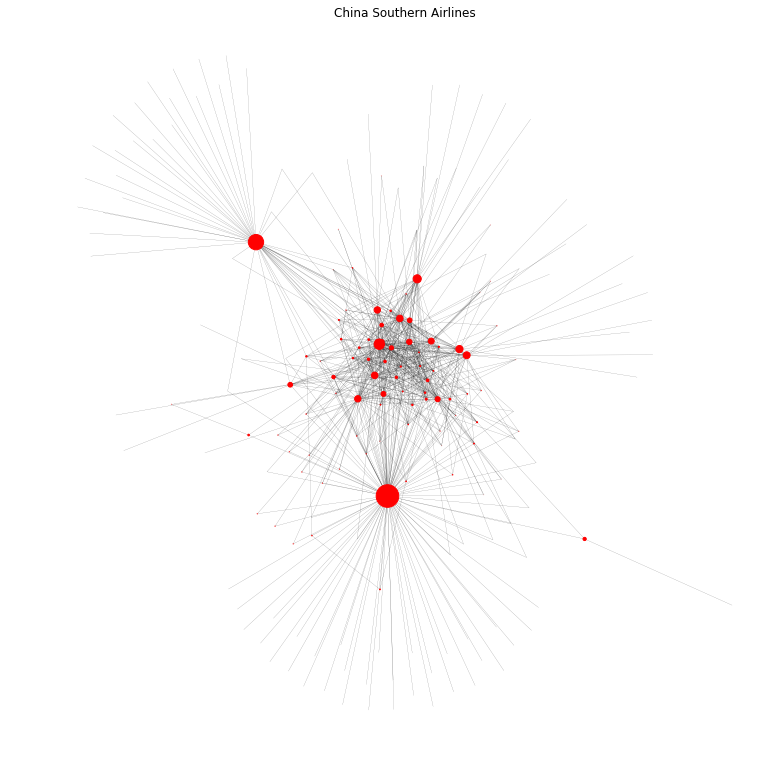

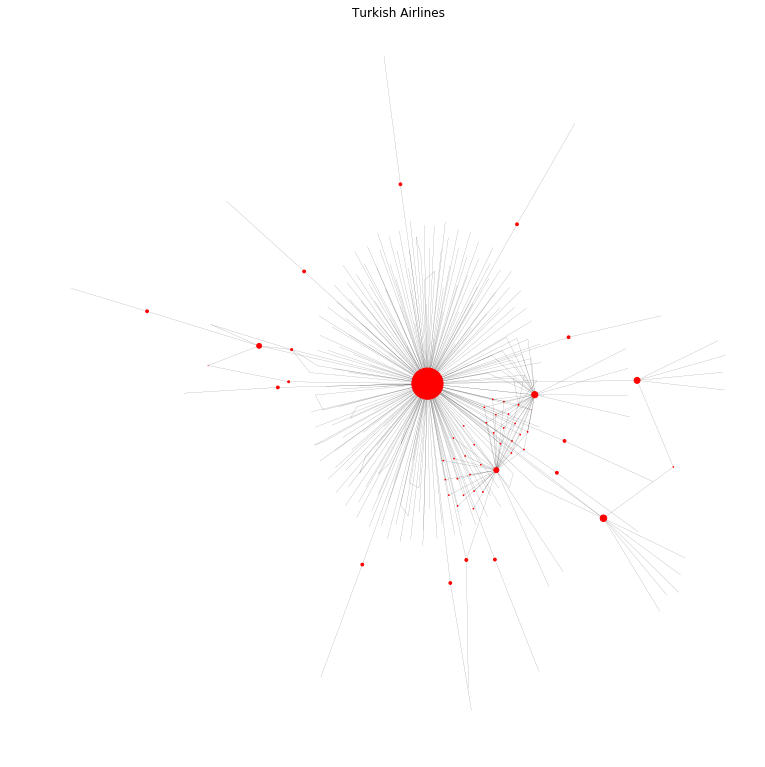

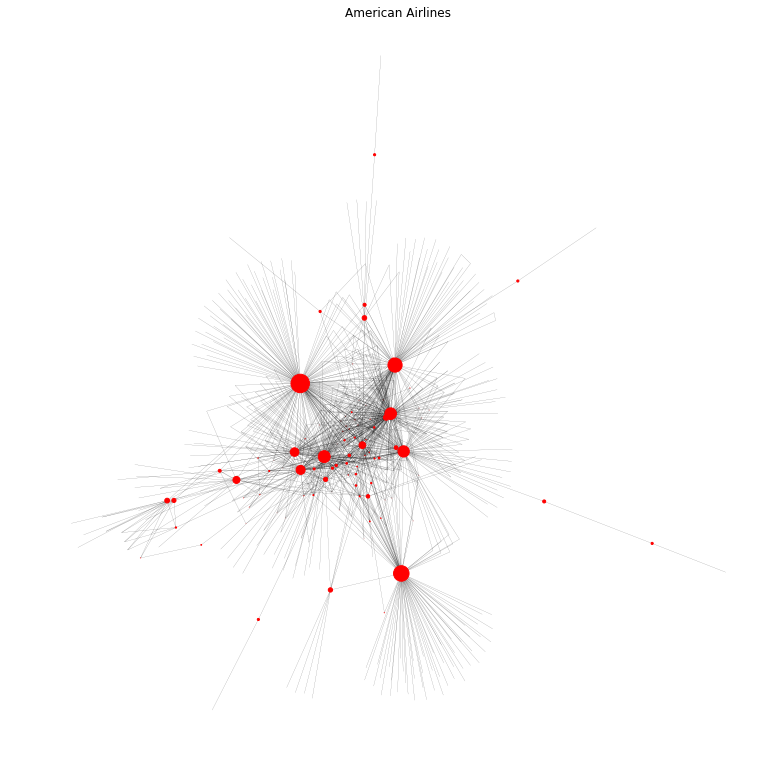

In [37]:
for best in Large_Airlines:
    draw_airline_network(best)

In [38]:
merged_routes.Name.unique()

array(['40-Mile Air', 'Aigle Azur', 'American Airlines',
       'Asiana Airlines', 'Askari Aviation', 'Afriqiyah Airways',
       'Allegiant Air', 'ABSA - Aerolinhas Brasileiras',
       'Astral Aviation', 'Air Tindi', 'Adria Airways', 'Air Europa',
       'Aegean Airlines', 'Air Europe', 'Alaska Central Express',
       'Air Italy', 'Ariana Afghan Airlines', 'Aeroflot Russian Airlines',
       'Air Bosna', 'Air France', 'Air Caledonie International',
       'Air Salone', 'Air Namibia', 'Aeroper', 'Azerbaijan Airlines',
       'Air Berlin', 'Air India Limited', 'Air Bourbon',
       'Air Atlanta Icelandic', 'Air Tahiti Nui', 'Arkia Israel Airlines',
       'Air One', 'Air Sahara', 'Air Malta', 'Air Sicilia', 'Air Macau',
       'Air Seychelles', 'AeroMéxico', 'All Nippon Airways',
       'Air Niugini', 'Air Arabia', 'Air Canada', 'Air Baltic',
       'Air Nippon', 'Airnorth', 'Air North Charter - Canada',
       'Air New Zealand', 'Aero Flight', 'Arrow Air', 'Aerocondor',
       'Aerol

In [39]:
Chinese = ['China Southern Airlines', 'China Eastern Airlines', 'Air China']

/anaconda3/envs/Biblio/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


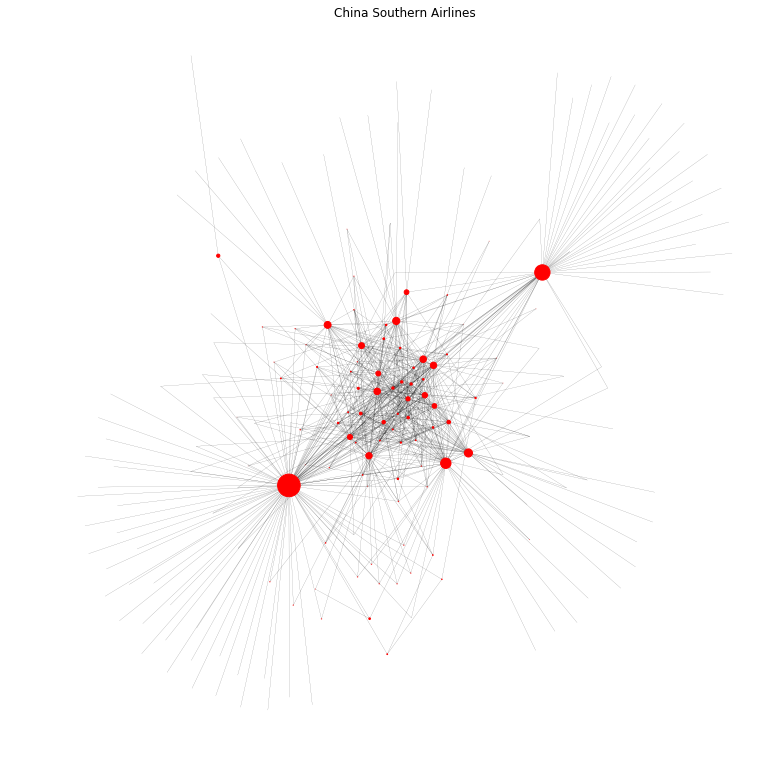

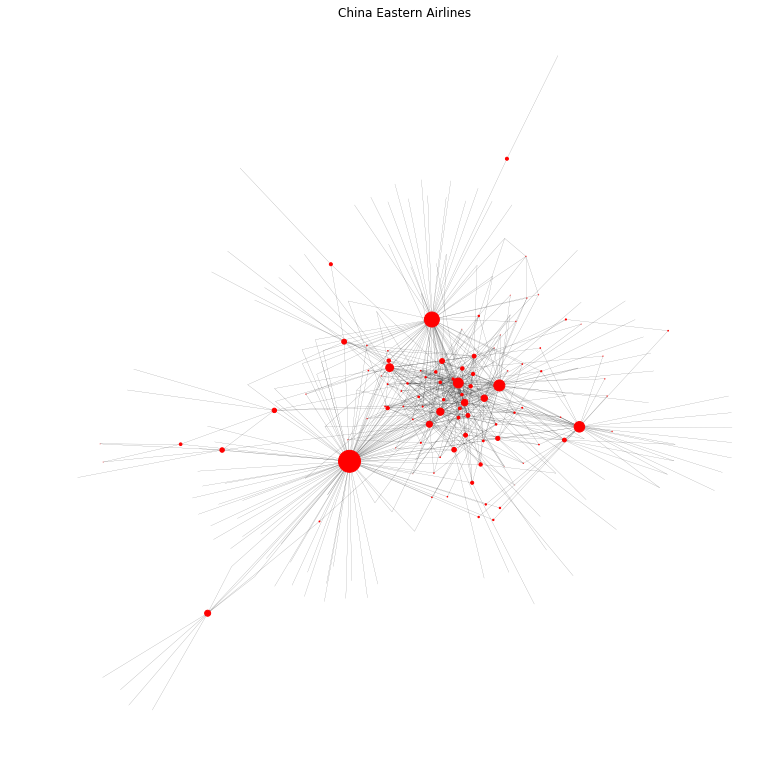

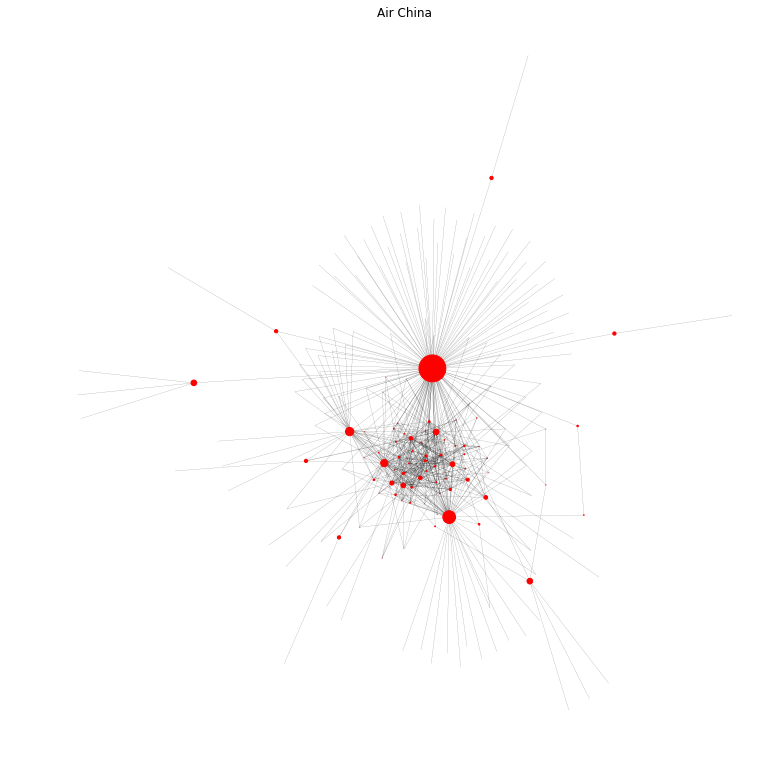

In [40]:
for best in Chinese:
    draw_airline_network(best)